<center><font size = "10"> Week 3 - Ion Channels <center>
<center><font size = "8">Tutorial 02: Channel Model<center>

<font size = "3"><font color = "blue">In this tutorial you will learn: 
    
<font size = "3"><font color = "blue">- how to create ion channel models
    
<font size = "3"><font color = "blue">- how to implement the model on a modeled cell with Neuron

# 1. Passive membrane 
    
In the absence of stimulation, a neuron's membrane potential diffuses to its resting potential.
This is mediated by a number of 'passive' ion channels in the membrane.
The open probability of passive channels does not depend on membrane potential, and so in all circumstances they simply drive the membrane potential toward their ion's reversal potential.


A basic model of these passive ion channels is built into NEURON.
They can be inserted into a NEURON Section with `.insert("pas")`, where `"pas"` is the name of the passive membrane model.

In [1]:
from neuron import h
import matplotlib.pyplot as plt
%matplotlib inline

--No graphics will be displayed.


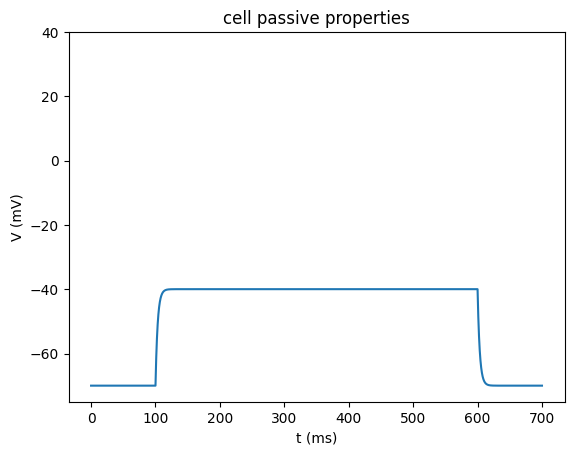

In [2]:
# Create a section 
soma = h.Section()
soma.L = 18.8     # length (µm)
soma.diam = 18.8  # diameter (µm)
soma.Ra = 123.0   # axial resistivity (Ω*cm)
soma.cm = 1       # capacitance (µF/cm^2) 

# Insert passive properties
soma.insert('pas')
for seg in soma:
    seg.pas.g = 0.0003 # Conductance of the leak channels (in S/cm2)
    seg.pas.e = -70   # Leak reversal potential, it influences the steady state membrane potential

# Inject a current step into the soma
stim = h.IClamp(soma(0.5))         # Place a stimulation electrode in the middle of the soma
stim.delay = 100   # stim delay (ms)
stim.amp = 0.1     # stim amplitude (pA)
stim.dur = 500     # stim duration (ms)

# Initialize NEURON vectors to record time, voltage and current
# time vector
rec_t = h.Vector()
rec_t.record(h._ref_t)
# membrame potential vector
rec_v = h.Vector()
rec_v.record(soma(0.5)._ref_v)
# current
rec_i = h.Vector()
rec_i.record(stim._ref_i)

# Initialize and run a simulation
h.load_file('stdrun.hoc')
h.finitialize(-70)
h.continuerun(700)

plt.figure()
plt.title('cell passive properties')
plt.ylim([-75, 40])
plt.ylabel('V (mV)')
plt.xlabel('t (ms)')
plt.plot(rec_t,rec_v);

## 1.1 Changing cell membrane capacitance

<font size="3">Considering the membrane as an RC circuit in which:
\begin{equation}  
    I_m = C_m\frac {dV_m}{dt}
\end{equation}
    
<font size="3">The change in the membrane potential ($V_m$) caused by a square current pulse $I_m$ is slowed down by the capacitive properties of the cell membrane ($Tau_m = R_m*C_m$). $Tau_m$ is the time constant of the membrane, which represents the time to achieve a 63% of change in the membrane voltage. You may remember it from week 1.

<br><img src="MembraneRC.png" width="450" height="250">   

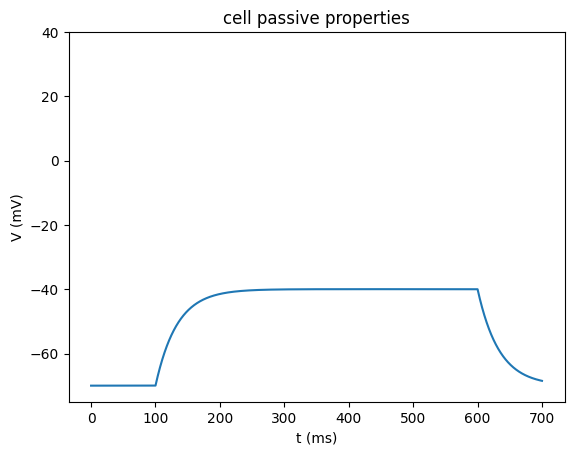

In [3]:
# Increasing the capacitance to 10
soma.cm = 10

# And we run the simulation again...
h.load_file('stdrun.hoc')
h.finitialize(-70)
h.continuerun(700)

plt.figure()
plt.title('cell passive properties')
plt.ylim([-75, 40])
plt.ylabel('V (mV)')
plt.xlabel('t (ms)')
plt.plot(rec_t,rec_v);

<font size = "3">We can see that now the cell has bigger capacitance, which means that it charges and discharges slower.

# 2. Active membrane behavior

Some ion channels in a neuron respond to changes in membrane potential, leading to, for example, action potentials (more on this in tutorial 3).

NEURON has a common model of action potential generation built-in: the Hodgkin–Huxley model (hh).


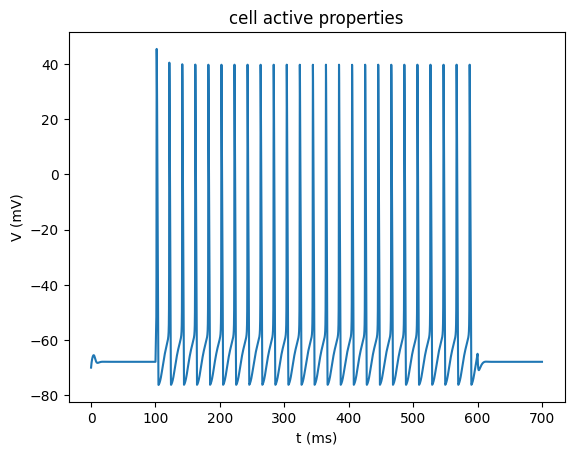

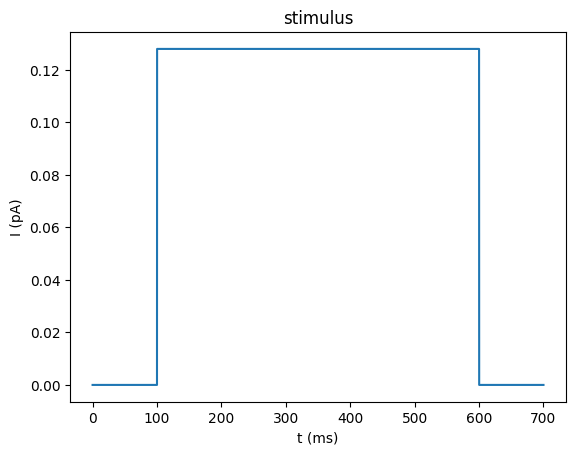

In [4]:
# change conductance value back to 1 µF/cm^2
soma.cm = 1

# insert hh
soma.insert('hh')
for seg in soma:
    seg.hh.gkbar = 0.1   # Maximal conductance of the potassium channels
    seg.hh.gnabar = 0.4  # Maximal conductance of the sodium channels

# We also have to inject higher current
stim.amp = 0.128

# simulate
#h.load_file('stdrun.hoc')
h.finitialize(-70)
h.continuerun(700)

plt.figure()
plt.title('cell active properties')
plt.ylabel('V (mV)')
plt.xlabel('t (ms)')
plt.plot(rec_t,rec_v)

plt.figure()
plt.title('stimulus')
plt.ylabel('I (pA)')
plt.xlabel('t (ms)')
plt.plot(rec_t,rec_i);

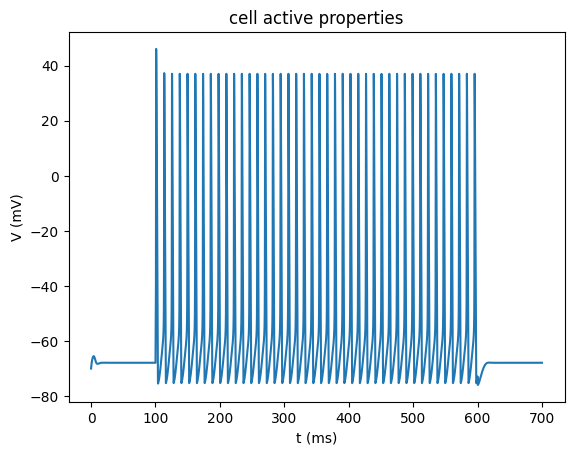

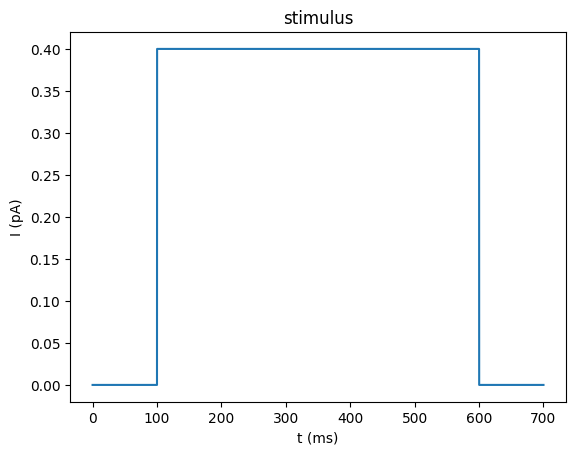

In [5]:
# Injecting more current will increase the firing frequency of the cell
stim.amp = 0.4

# simulate
#h.load_file('stdrun.hoc')
h.finitialize(-70)
h.continuerun(700)

plt.figure()
plt.title('cell active properties')
plt.ylabel('V (mV)')
plt.xlabel('t (ms)')
plt.plot(rec_t,rec_v)

plt.figure()
plt.title('stimulus')
plt.ylabel('I (pA)')
plt.xlabel('t (ms)')
plt.plot(rec_t,rec_i);

# 3. Your own ion channel models can  be implemented in NMODL.
See tutorial 3.

